## `Water Potability Classification`

**Problem Statement**: 
Basically this Dataset is a collection a water samples of different localities at different times to determine whether the water is safe for drinking or not. It includes several basic physical & chemical components present in the water and compares them with human consumable range and based on those scores we classify the sample as potable or not.

Importing the necessary libraries. We will import only initial lobraries, i prefer importing required libraries at the place of its use

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Dataset

In [ ]:
df = pd.read_csv("water_potability.csv")
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Our dataset contains following informations

*   3276 instances and 10 columns
*   All the columns are float data type except the target variable which is in in data type
*   There are some missing values as seen in the ph, Sulfate & Trihalomethanes columns





In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

491 missing values in ph column, 781 of those in Sulfate and 162 of those in Trihalomethanes columns which is within the range of 3-40% of total available data, thus we will fill them with mean values

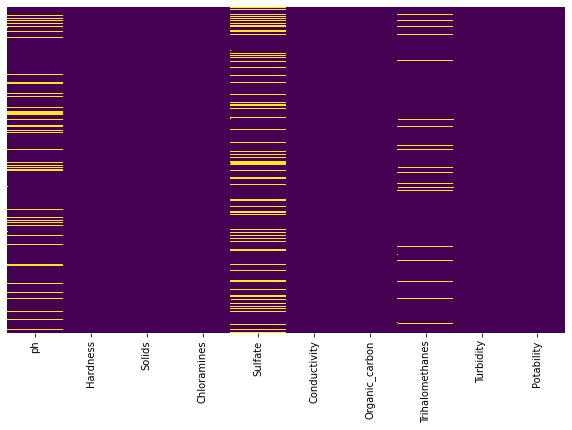

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Removing Null Values

In [ ]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan, strategy = "mean")
df[["ph", "Sulfate", "Trihalomethanes"]] = si.fit_transform(df[["ph", "Sulfate", "Trihalomethanes"]])

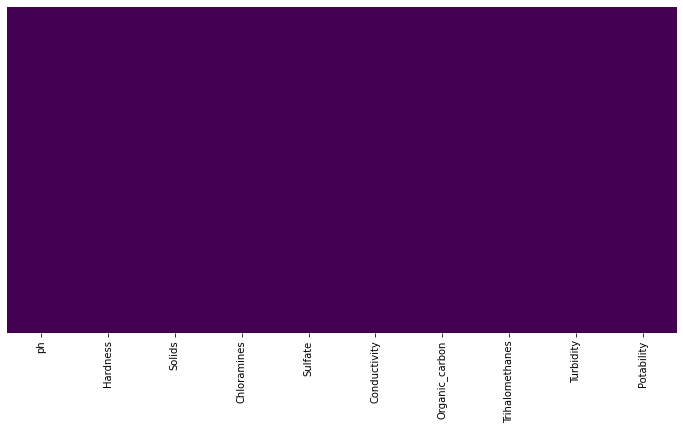

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


From above information we draw following conclusions:

*   In all the columns, mean is almost equal to median, though it is a little on a higher side which shows a little right side skewness but those are marginal.
*   Only "Solids" column has some visible skewness as mean is greater than median by an amount of roughly around 1900 units which shows right side skewness



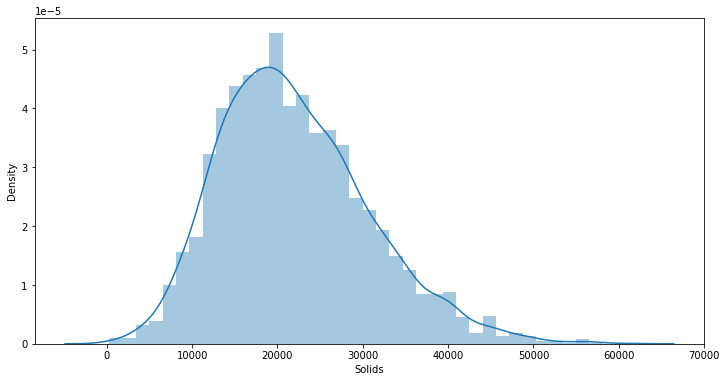

In [ ]:
plt.figure(figsize = (12,6))
sns.distplot(df["Solids"])

- We can see rights side skewness from above distribution plot
- Plotting the hetmap to find out if there is any correlations among the dependent variables in our data

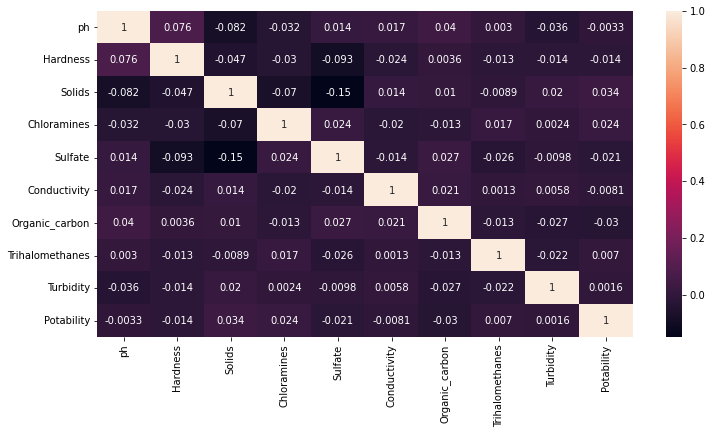

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(data = df.corr(), annot = True)

There are some correlations between "sulfates" and "Solids" columns but first we will check the outliers and see if above situations improves after removing the outliers

In [ ]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.080795,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


Splitting the data into features and targets for analysis

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
colname = x.columns

Scaling the dataset as there are variations in readings range to a great extent we are scaling the date to bring it to similar range forn comparison and ANN model requires data in scaled manner

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
x = pd.DataFrame(x, columns=colname)
print(f"X shape : {x.shape}, Y Shape : {y.shape}")

X shape : (3276, 9), Y Shape : (3276,)


Converting the array recieved from Standard Scaler to DataFrame for plotting a boxplot and check the outliers

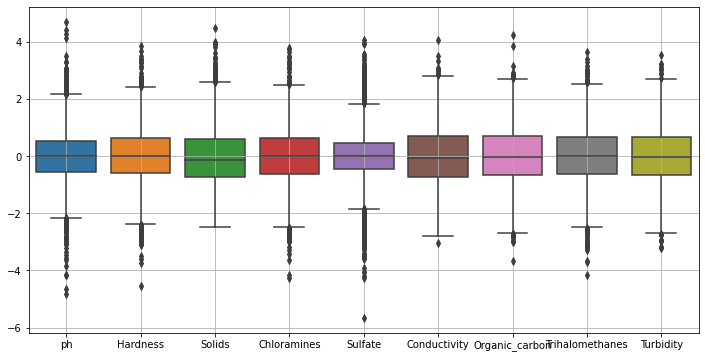

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(data = x)
plt.grid()

I tried removing outliers but the accuracy & recall value was reduced, hence we will not remove the outliers. Now, we can move to model building now

In [ ]:
y.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

- There is some varied distribution in the target varible and thus we will stratify the data in training the model.
- Building the model now

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=100, stratify=y)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

Model Building

In [ ]:
ann = Sequential()

ann.add(Dense(units = 32, activation = "relu"))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units = 16, activation = "relu"))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units = 8, activation = "relu"))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units = 8, activation = "relu"))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units = 1, activation = "sigmoid"))

ann.compile(optimizer = "adam", loss="binary_crossentropy")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)
ann.fit(xtrain, ytrain, epochs=600, validation_data=(xtest, ytest), callbacks=[earlystop], verbose=1)

Epoch 1/600
82/82 [==============================] - 1s 5ms/step - loss: 0.7164 - val_loss: 0.6826
Epoch 2/600
82/82 [==============================] - 0s 3ms/step - loss: 0.6990 - val_loss: 0.6808
Epoch 3/600
82/82 [==============================] - 0s 3ms/step - loss: 0.6877 - val_loss: 0.6784
Epoch 4/600
82/82 [==============================] - 0s 3ms/step - loss: 0.6812 - val_loss: 0.6761
Epoch 5/600
82/82 [==============================] - 0s 3ms/step - loss: 0.6806 - val_loss: 0.6743
Epoch 6/600
82/82 [==============================] - 0s 3ms/step - loss: 0.6773 - val_loss: 0.6728
Epoch 7/600
82/82 [==============================] - 0s 3ms/step - loss: 0.6744 - val_loss: 0.6720
Epoch 8/600
82/82 [==============================] - 0s 4ms/step - loss: 0.6726 - val_loss: 0.6713
Epoch 9/600
82/82 [==============================] - 0s 3ms/step - loss: 0.6730 - val_loss: 0.6708
Epoch 10/600
82/82 [==============================] - 0s 3ms/step - loss: 0.6705 - val_loss: 0.6704
Epoch 11/

We have used Dropout layer with 50% drop rate and early stopping at to find Global minimum with patience of 50 steps. We have used 4 hidden layers in above ANN model with 32 neurons in 1st layer, 16 Neuron in the next layer and 16 each in last 2 layers. The activation function used is "relu" in hidden layer and since it is a bi-varied target variable we have used "sigmoid" activation function in output layer. The optimizer used is "adam" and the loss function is "binary_crossentropy".

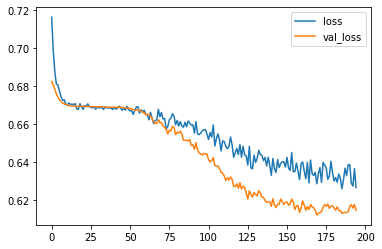

In [ ]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

Setting the threshold at 50%

In [ ]:
ypred = ann.predict(xtest)
ypred = ypred > 0.5

21/21 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77       400
           1       0.65      0.40      0.50       256

    accuracy                           0.68       656
   macro avg       0.67      0.63      0.63       656
weighted avg       0.67      0.68      0.66       656



From above classification report we can see that our model is having 64% accuracy with a recall value of 78% for category 0 and 42% for category 1. Also the F1 score is found to be pretty descent at 73% for category 0 and 47% for category 1

In [ ]:
ann.save("WaterPotability_Ismail")

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Now our model is trained and we can predict new values. Thus predicting one such random value

In [ ]:
new = [[4.5, 139, 21000, 8.6, 318, 420, 14, 72, 4.05]]
anc = sc.transform(new)
ypred = ann.predict(anc)
if (ypred>0.5):
  print("This Water is suitable for drinking")
else:
    print("This Water is not suitable for drinking")

1/1 [==============================] - 0s 78ms/step
This Water is not suitable for drinking
